## Observations and Insights 

In [249]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
len(mouse_metadata)

249

In [5]:
# Checking the number of mice.
Number_mice = len(combine["Mouse ID"].unique())
print("The number of mice is " + str(Number_mice))

The number of mice is 249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combine[combine.duplicated()]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
#return duplicated rows for g989 mouse ID
a = combine.loc[combine["Mouse ID"] == "g989", :]
a

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combine.drop(combine[(combine['Mouse ID'] == "g989")].index, inplace=True)
len(combine)

1880

In [9]:
# Checking the number of mice in the clean DataFrame.
Number_mice = len(combine["Mouse ID"].unique())
print("The number of mice after data cleaning is " + str(Number_mice))

The number of mice after data cleaning is 248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = combine.groupby('Drug Regimen')

summary['Tumor Volume (mm3)'].mean()
summary['Tumor Volume (mm3)'].median()
summary['Tumor Volume (mm3)'].var()
summary['Tumor Volume (mm3)'].std()
summary['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean Tumor Volumn": summary['Tumor Volume (mm3)'].mean(),
                           "Median Tumor Volumn": summary['Tumor Volume (mm3)'].median(),
                           "Tumor Volumn Variance": summary['Tumor Volume (mm3)'].var(),
                           "Tumor Volumn Std. Dev.": summary['Tumor Volume (mm3)'].std(),
                           "Tumor Volumn Std. Err.": summary['Tumor Volume (mm3)'].sem()


})
summary_df

,Mean Tumor Volumn,Median Tumor Volumn,Tumor Volumn Variance,Tumor Volumn Std. Dev.,Tumor Volumn Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#a = summary["Tumor Volume (mm3)"].aggregate(["mean"])
#b = summary["Tumor Volume (mm3)"].aggregate(["median"])
#c = summary["Tumor Volume (mm3)"].aggregate(["var"])
#d = summary["Tumor Volume (mm3)"].aggregate(["std"])
#e = summary["Tumor Volume (mm3)"].aggregate(["sem"])
#result = pd.concat([a, b, c, d, e], axis=1, join='inner')


result = combine.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
display(result)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

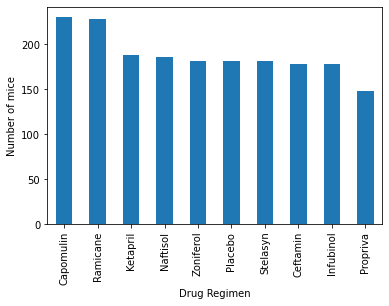

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_mice = summary['Mouse ID'].count()
total_mice_df = total_mice.sort_values(ascending=False)
#patron_chart = total_mice_df.plot(kind="bar", title="Mice tested for each drug regimen")
patron_chart = total_mice_df.plot.bar(rot=90)
patron_chart.set_xlabel("Drug Regimen")
patron_chart.set_ylabel("Number of mice")

plt.show()
plt.tight_layout()

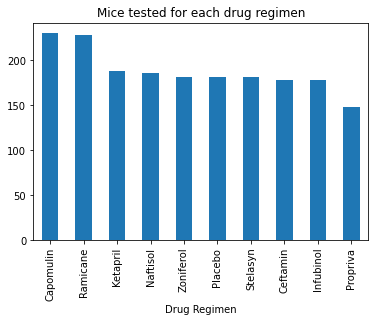

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
patron_chart = total_mice_df.plot(kind="bar", title="Mice tested for each drug regimen")
plt.show()
plt.tight_layout()

In [14]:
len(mouse_metadata)

249

In [15]:
mouse_metadata.drop(mouse_metadata[(mouse_metadata['Mouse ID'] == "g989")].index, inplace=True)
len(mouse_metadata)

248

In [16]:
a = mouse_metadata['Sex'].value_counts()
a

Male      125
Female    123
Name: Sex, dtype: int64

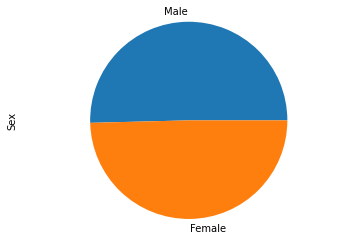

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie = a.plot.pie(y='Sex')
#pie.set_ylabel("Branch Checkouts")
plt.axis("equal")
plt.show()

(-1.1031843716069307,
 1.1001516367431872,
 -1.103492681505578,
 1.1018390827045563)

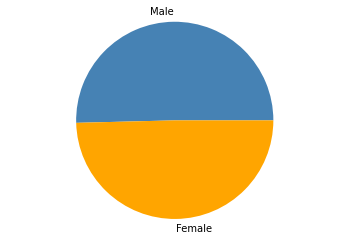

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colors = ["steelblue", "orange"]
plt.pie(a, labels=labels, colors=colors)
plt.axis("equal")

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#combine['Timepoint'].max
# Start by getting the last (greatest) timepoint for each mouse
#roy = combine.groupby(['Mouse ID'])
#roy.head()
combine.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [73]:
group = combine.groupby("Mouse ID")
group.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2


In [75]:
#get the greatest timepoint for each mouse
max_x = group['Timepoint'].max()
max_x.head(10)

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
a401    45
a411    45
a444    45
a457    10
a492    45
Name: Timepoint, dtype: int64

In [77]:
timepoint_mice = pd.merge(combine, max_x, on=["Mouse ID"])
timepoint_mice.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
5,k403,Ramicane,Male,21,16,25,33.464577,1,45
6,k403,Ramicane,Male,21,16,30,31.099498,1,45
7,k403,Ramicane,Male,21,16,35,26.546993,1,45
8,k403,Ramicane,Male,21,16,40,24.365505,1,45
9,k403,Ramicane,Male,21,16,45,22.050126,1,45


In [86]:
#screen for rows with timepoint being the final timepoint
rslt_df = timepoint_mice[timepoint_mice['Timepoint_x'] == timepoint_mice['Timepoint_y']]
rslt_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1849,z435,Propriva,Female,12,26,10,48.710661,0,10
1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [99]:
rslt_df['Drug Regimen']

9        Ramicane
19      Capomulin
29      Capomulin
39      Capomulin
49       Ramicane
          ...    
1846     Stelasyn
1849     Propriva
1859    Infubinol
1869     Naftisol
1879     Naftisol
Name: Drug Regimen, Length: 248, dtype: object

In [105]:
len(rslt_df['Drug Regimen'])

248

In [108]:
rslt_df['Tumor Volume (mm3)']

9       22.050126
19      23.343598
29      28.484033
39      28.430964
49      29.128472
          ...    
1846    45.934712
1849    48.710661
1859    62.754451
1869    65.741070
1879    73.867845
Name: Tumor Volume (mm3), Length: 248, dtype: float64

In [206]:
# Put treatments into a list for for loop (and later for plot labels)
Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
for x in Regimen:
    test = rslt_df.loc[rslt_df["Drug Regimen"] == x]["Tumor Volume (mm3)"]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = test.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values of {x} below {lower_bound} could be outliers.")
    print(f"Values of {x} above {upper_bound} could be outliers.")
    tumor_volume.append(test)
    test.loc[(test < lower_bound)|(test > upper_bound)]
    # Locate the rows which contain mice on each drug and get the tumor volumes
    print(f"The outlier of {x} is {test.loc[(test < lower_bound)|(test > upper_bound)]}.")
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

Values of Capomulin below 20.70456164999999 could be outliers.
Values of Capomulin above 51.83201549 could be outliers.
The outlier of Capomulin is Series([], Name: Tumor Volume (mm3), dtype: float64).
Values of Ramicane below 17.912664470000003 could be outliers.
Values of Ramicane above 54.30681135 could be outliers.
The outlier of Ramicane is Series([], Name: Tumor Volume (mm3), dtype: float64).
Values of Infubinol below 36.83290494999999 could be outliers.
Values of Infubinol above 82.74144559000001 could be outliers.
The outlier of Infubinol is 669    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Values of Ceftamin below 25.355449580000002 could be outliers.
Values of Ceftamin above 87.66645829999999 could be outliers.
The outlier of Ceftamin is Series([], Name: Tumor Volume (mm3), dtype: float64).


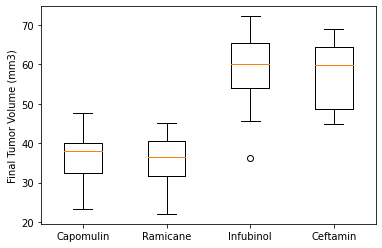

In [193]:
# Display the plot
fig1, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume)
ax1.set_xticklabels(Regimen)
plt.show()

## Line and Scatter Plots

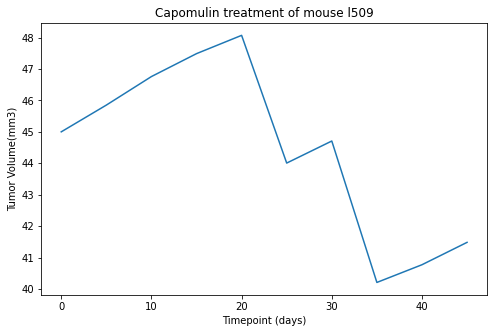

In [240]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_capo = combine.loc[combine["Drug Regimen"] == "Capomulin"]
line_capo
mousel509 = line_capo.loc[line_capo["Mouse ID"] == "l509"]
mousel509
tumorl509 = mousel509[["Tumor Volume (mm3)","Timepoint"]]
tumorl509 = tumorl509.set_index("Timepoint")
multi_plot = tumorl509.plot(kind="line", figsize=(8,5), title = "Capomulin treatment of mouse l509",
               xlabel = "Timepoint (days)",
               ylabel = "Tumor Volume(mm3)", legend = None)

Text(0, 0.5, 'Average Tumor Volume (mm3)')

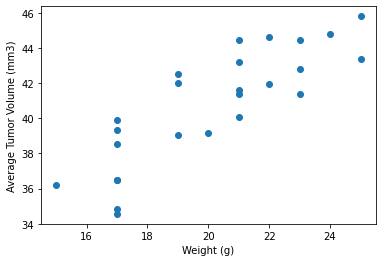

In [246]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_ave = line_capo.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
tumor_ave
weight = line_capo.groupby("Mouse ID")["Weight (g)"].mean()
weight
plt.scatter(weight,tumor_ave)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [247]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,tumor_ave)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


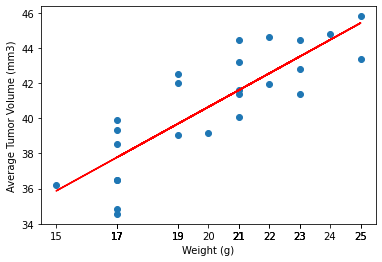

In [256]:
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(weight,tumor_ave)
p_fit = p_slope * weight + p_int
plt.scatter(weight,tumor_ave)
plt.plot(weight,p_fit,"r-")
plt.xticks(weight, rotation=0)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()